## DIY img2img sampling function (PipeLine)

cpu


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, du

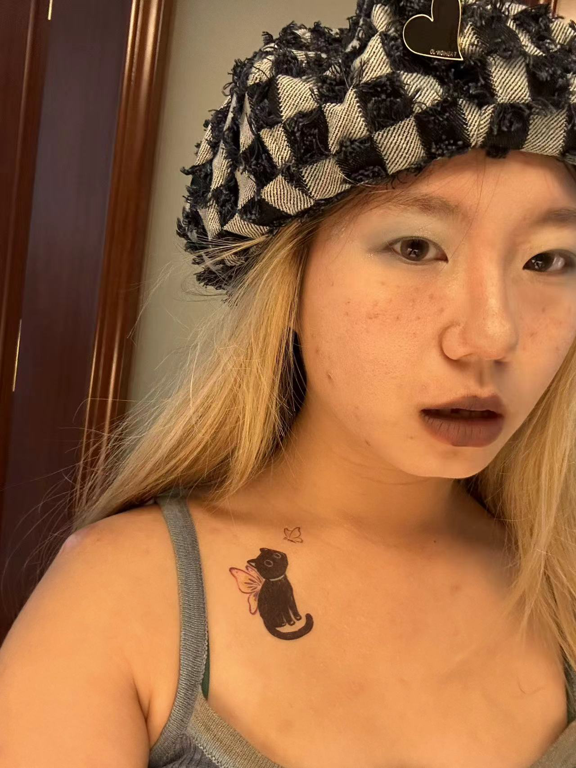

In [2]:
import torch
import requests
from PIL import Image
from io import BytesIO
from diffusers import StableDiffusionImg2ImgPipeline

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
pipe=StableDiffusionImg2ImgPipeline.from_pretrained('/data_disk/dyy/Ghibli-Diffusion',torch_dtype=torch.float16).to(device)

init_image = Image.open("./jpgs/g5.jpg").convert('RGB')
init_image.thumbnail((768, 768))
init_image

In [ ]:
prompt = "ghibli style,a young cute girl in summer"

generator=torch.Generator(device=device).manual_seed(1024)
image=pipe(prompt=prompt,image=init_image,strength=0.75,generator=generator,guidance_scale=7,num_inference_steps=50).images[0]    
#strength控制噪声的强度,strength=0.7表示保留0.3的原图,,同时迭代步数也受到影响
image